<a href="https://colab.research.google.com/github/harnalashok/LLMs/blob/main/xinference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Experimenting with Xinference

## What is Xinference

>*X*orbits *Inference* (Xinference) is an open-source platform to streamline the operation and integration of a wide array of AI models. With Xinference, you’re empowered to run inference using any open-source LLMs, embedding models, and multimodal models either in the cloud or on your own premises, and create robust AI-driven applications.

## vLLM vs llama.cpp

 vLLM is faster but it’s gpu only, so you’ll need quite a bit of vram for larger models.

vLLM also does not support variable bit quantization. So no q3,q5,q6s.

## What are LLM Model Formats?

>LLMs are massive, and to make them practical for deployment, especially on consumer hardware, their size needs to be reduced. Model formats are techniques for achieving this reduction, primarily through quantization. Quantization involves converting the model's weights and sometimes its activations from higher precision (like 32-bit or 16-bit) to lower bit formats (like 8-bit or 4-bit), which significantly decreases memory usage and computational load.


### Why different formats are needed

>The original, full-precision versions of LLMs are massive, consisting of billions of parameters. This makes them expensive and difficult to run on standard consumer hardware, such as personal computers or mobile phones. Model formats solve this problem by:

>>Reducing model size: Quantization, a core technique in many formats, maps the model's weights from high-precision formats (like 32-bit floats) to lower-precision formats (like 4-bit integers). This significantly shrinks the model file.

>>Speeding up inference: A smaller, more efficient model requires less memory and can run faster, especially on devices with limited resources.


>>Enabling broad compatibility: Some formats are designed to run on specific hardware, such as CPUs, while others are optimized for GPUs.


>>Prominent LLM model formats:

>>GGUF (GPT-Generated Unified Format)

>>>Purpose: The GGUF format is optimized for running models on consumer-grade hardware, particularly CPUs, while also supporting GPU offloading for acceleration.

>>>Design: It is a single-file, binary format that stores all model parameters, metadata, and tokenizer information. This makes it unambiguous, easily shareable, and fast to load.

>>>Quantization: The format supports multiple quantization levels, including 2-bit, 4-bit, and 8-bit, giving users control over the trade-off between model size, speed, and accuracy.
GPTQ (General Pre-trained Transformer Quantization)

>>>Purpose: GPTQ is a technique for one-shot post-training quantization that heavily focuses on accelerating inference on GPUs.

>>>Design: It quantizes the model layer-by-layer to a very low bit-width (often 4-bit) while minimizing the loss of accuracy. It achieves this by updating other weights in a group to compensate for the quantization error of one weight.

>>>Implementation: During inference, the 4-bit integer weights are dequantized to higher precision on the fly within the GPU's memory. This is much faster than loading larger, full-precision weights.


>>AWQ (Activation-aware Weight Quantization)

>>>Purpose: AWQ is another quantization method that focuses on compressing models to 4-bits with minimal performance degradation, especially for GPU inference.

>>>Design: The key insight of AWQ is that not all model weights are equally important for performance. It identifies and protects only the most "salient" (important) weights from quantization based on the distribution of their activation values. The remaining weights are quantized to a lower precision.

>>>Benefit: By focusing the quantization on less critical weights, AWQ significantly reduces model size while retaining accuracy.


>>ONNX (Open Neural Network Exchange)

>>>Purpose: ONNX is an open standard designed to promote interoperability between different machine learning frameworks, such as PyTorch and TensorFlow.

>>>Design: It provides a universal format for representing a model's computational graph and parameters. This allows a model trained in one framework to be converted to ONNX and then deployed for inference in another.

>>>Application: While not a quantization method itself, models saved in ONNX format can be used with compatible runtimes that offer hardware-specific optimizations.


## Install xinference
References:     
>> [first](https://github.com/xorbitsai/xllamacpp?tab=readme-ov-file#install)      
>> [second](https://inference.readthedocs.io/en/latest/getting_started/installation.html#llama-cpp-backend)      
>> [third](https://inference.readthedocs.io/en/latest/getting_started/installation.html#vllm-backend)       
>> [fourth](https://inference.readthedocs.io/en/latest/getting_started/installation.html#transformers-backend)       


In Linux shell execute the following, one by one. In the python environment,  use pip to install, in the order it is mentioned below:

1. `source /home/ashok/langchain/bin/activate`  

2. `pip install xllamacpp --force-reinstall --index-url https://xorbitsai.github.io/xllamacpp/whl/cu124 --extra-index-url https://pypi.org/simple`     
3. `pip install "xinference[llama_cpp]"`     
4. `pip install "xinference[vllm]"`     
5. `pip install "xinference[transformers]"`    

This does not work:    
`pip install "xinference[all]"`   



Start xinference locally, in linux shell, execute the following two commands. as:

1. `source /home/ashok/langchain/bin/activate`    
2. `xinference-local --host 0.0.0.0 --port 9997`      
3. In browser, access: `http://localhost:9997`     

## Base URL:   
xinference base url is:     

`http://192.240.4.102:9997`     

OR  

`http://host.docker.internal:9997`     


You need to launch a model to use it. Click tab of `RERANK MODELS` and launch, say `bge-reranker-base` model. It takes you to a form--If Model ENGINE exists, select it and down below click Launch symbol. The model is downloaded, cached in `~/.xinference/cache/` folder.      
  

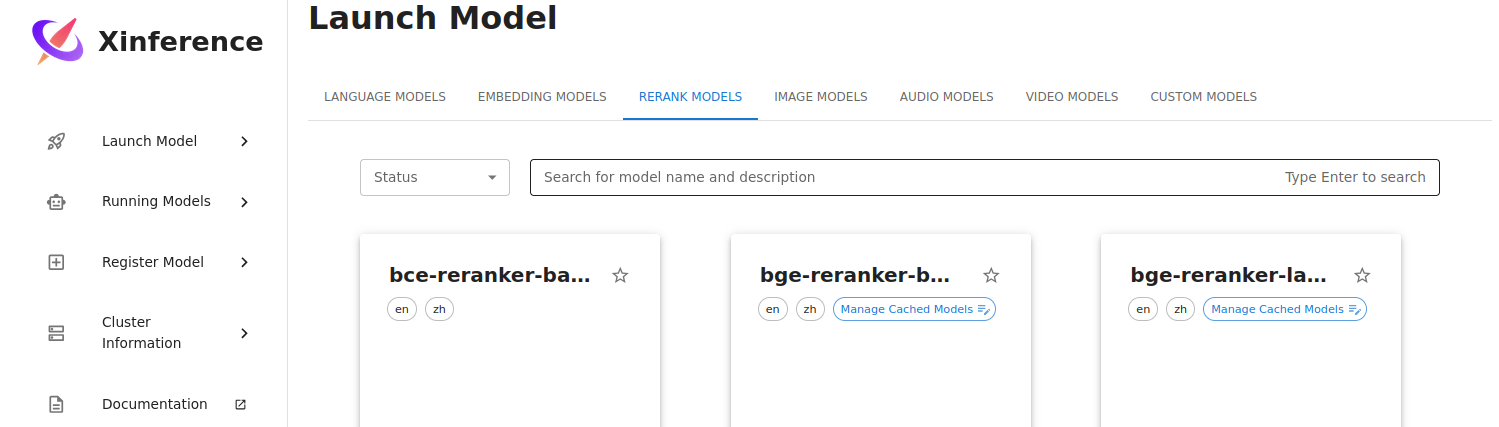

Launched RERANKed model(s).      
You can *unlaunch* it or <u>Terminate</u> launch by clicking on the icon under the <b>Actions</b>.        
An unlaunched model remains available in cache. To be used by RagFlow, it needs to be launched again. But re-launching it does NOT download it again.

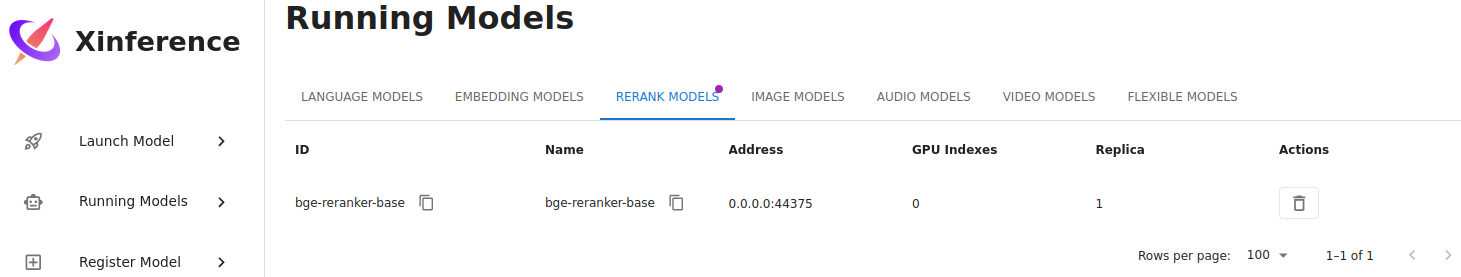

## Xinference expts
See [here](https://inference.readthedocs.io/en/v1.4.1/getting_started/using_xinference.html)

List all models of a certain type that are available to launch in Xinference:     

`./activate_langchain_venv.sh`    
`xinference registrations -t LLM`    

the currently running models in Xinference:     

`./activate_langchain_venv.sh`     
`xinference list`    

When you no longer need a model that is currently running, you can remove it in the following way to free up the resources it occupies:     

`./activate_langchain_venv.sh`     
`xinference terminate --model-uid "qwen2.5-instruct"`



## Backends

>> Xinference supports multiple backends for different models. After the user specifies the model, xinference will automatically select the appropriate backend. Some supported backends are:     
>>> llama.cpp     
>>> vLLM    
>>>>It is a fast and easy-to-use library for LLM inference and serving. It uses only GPU    

>>> Auto NGL    
>>> Transformers: vllm     
>>>>Transformers supports the inference of most state-of-art models. It is the default backend for models in PyTorch format.    

>>> SGLang    
>>> MLX     

In [ ]:
###########